In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
file_path = 'student_details_csv.csv'

data = pd.read_csv(file_path)

# Convert categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Income', 'Family_size ', 'Objective', 'Study_pattern', 
                       'Time_spent_pattern', 'Extra_curricular_activity', 'Paused_resumed']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Select relevant features for prediction
features = ['Tenth_marks', 'Eleventh_marks', 'Gender', 'Income', 'Family_size ', 
            'Objective', 'Study_pattern', 'Time_spent_pattern', 
            'Extra_curricular_activity', 'Paused_resumed']
target = 'Twelfth_marks'

# Ensure that the feature columns are numeric
data[features] = data[features].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (if any)
data.dropna(subset=features + [target], inplace=True)

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regressor - \nMAE: {mae_dt:.4f}\nMSE: {mse_dt:.4f}\nR2 Score: {r2_dt:.4f}')

Decision Tree Regressor - 
MAE: 2.7394
MSE: 13.2798
R2 Score: 0.3533


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Linear Regressor
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)
y_pred_lr = lr_regressor.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regressor - \nMAE: {mae_lr:.4f}\nMSE: {mse_lr:.4f}\nR2 Score: {r2_lr:.4f}')

Linear Regressor - 
MAE: 1.8528
MSE: 5.9174
R2 Score: 0.7119


In [5]:
# Import the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model using MAE, MSE, and R2 Score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Random Forest Regressor -')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')

Random Forest Regressor -
MAE: 1.2861
MSE: 3.4446
R2 Score: 0.8323


In [6]:
# Import the K-Nearest Neighbors Regressor model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Create a K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test)

# Evaluate the model using MAE, MSE, and R2 Score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('K-Nearest Neighbors Regressor -')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')

K-Nearest Neighbors Regressor -
MAE: 1.4069
MSE: 4.9894
R2 Score: 0.7570


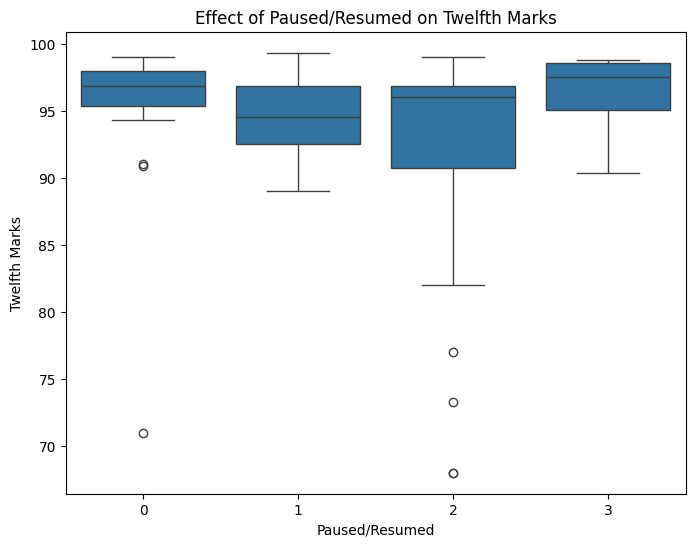

Paused_resumed
0    94.965000
1    94.545455
2    92.359773
3    96.057500
Name: Twelfth_marks, dtype: float64
Coefficient: -0.8758309278350519


In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new dataframe with only the relevant columns
paused_resumed_df = data[['Paused_resumed', 'Twelfth_marks']]

# Plot a boxplot to visualize the relationship
plt.figure(figsize=(8,6))
sns.boxplot(x='Paused_resumed', y='Twelfth_marks', data=paused_resumed_df)
plt.title('Effect of Paused/Resumed on Twelfth Marks')
plt.xlabel('Paused/Resumed')
plt.ylabel('Twelfth Marks')
plt.show()

# Calculate the mean Twelfth marks for each Paused/Resumed category
mean_marks = paused_resumed_df.groupby('Paused_resumed')['Twelfth_marks'].mean()
print(mean_marks)

# Create a simple linear regression model (not suitable for categorical variables, but we can use it as a rough estimate)
from sklearn.linear_model import LinearRegression

X = paused_resumed_df[['Paused_resumed']]
y = paused_resumed_df['Twelfth_marks']

lr_model = LinearRegression()
lr_model.fit(X, y)

# Print the coefficients (note that the coefficient will not be very meaningful in this case)
print(f'Coefficient: {lr_model.coef_[0]:}')


In [9]:
data.head(20)

,Reg_no,Gender,Degree,Tenth_marks,Eleventh_marks,Twelfth_marks,Income,Family_size,Objective,Study_pattern,Time_spent_pattern,Extra_curricular_activity,Paused_resumed
0,st101,0,II PU/12th,90.80,91.10,93.60,4,0,2,2,3,8,2
1,st102,1,II PU/12th,88.50,93.00,94.30,4,1,1,1,1,8,0
2,st103,0,II PU/12th,98.80,97.30,97.80,3,1,2,3,2,7,2
3,st104,0,II PU/12th,90.80,96.00,92.00,0,3,2,2,2,1,2
4,st105,1,II PU/12th,90.60,91.00,96.00,4,2,1,1,1,8,2
5,st106,0,II PU/12th,96.00,98.17,98.80,3,2,2,3,2,8,0
6,st107,0,II PU/12th,97.80,99.00,99.00,0,2,1,3,2,4,0
7,st108,1,II PU/12th,91.00,96.80,96.00,3,0,2,1,3,4,1
8,st109,1,II PU/12th,96.60,96.30,96.30,0,2,2,3,4,5,2
9,st110,0,II PU/12th,95.00,96.70,97.50,3,0,2,2,2,8,0
